<a href="https://colab.research.google.com/github/darkginka/Disease-Based-Diet-Recommanded-System/blob/main/DRS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Start**

In [322]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [323]:
import pandas as pd

In [324]:
####### dataset #######
food_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/food_nutrition.csv")
disease_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/disease_nutrition.csv",encoding='unicode_escape')

In [325]:
#food_nutrition.shape
food_nutrition.head()

Category                     Description  NutrientDataBankNumber  Carotene  \
0     Milk                     Milk, human                11000000         7   
1     Milk                       Milk, NFS                11100000         4   
2     Milk                     Milk, whole                11111000         7   
3     Milk         Milk, low sodium, whole                11111100         7   
4     Milk  Milk, calcium fortified, whole                11111150         7   

   Cryptoxanthin  Carbohydrate  Cholesterol  Choline  Fiber  \
0              0          6.89           14     16.0    0.0   
1              0          4.87            8     17.9    0.0   
2              0          4.67           12     17.8    0.0   
3              0          4.46           14     16.0    0.0   
4              0          4.67           12     17.8    0.0   

   Lutein and Zeaxanthin  ...  Potassium  Sodium  Zinc  Vitamin_A  \
0                      0  ...         51      17  0.17         61   
1                      0  ...        157      39  0.42         59   
2                      0  ...        150      38  0.41         32   
3                      0  ...        253       3  0.38         29   
4                      0  ...        150      38  0.41         32   

   Vitamin_B12  Vitamin_B6  Vitamin_C  Vitamin_D  Vitamin_E  Vitamin_K  
0         0.05       0.011        5.0      0.014       0.08        0.3  
1         0.56       0.060        0.1      0.057       0.03        0.2  
2         0.54       0.061        0.0      0.056       0.05        0.3  
3         0.36       0.034        0.9      0.020       0.08        0.3  
4         0.54       0.061        0.0      0.056       0.05        0.3  

[5 rows x 37 columns]

In [326]:
df_int = food_nutrition.select_dtypes(include=['int'])
# dataframe with integer format Data Types to Float
# df_int

In [327]:
int_columns=['Carotene',	'Cryptoxanthin',	'Cholesterol',	'Lutein and Zeaxanthin',	'Lycopene',	'Retinol',	'Calcium',	'Magnesium',	'Phosphorus',	'Potassium',	'Sodium',	'Vitamin_A']
# Replace Data Types to Float
food_nutrition[int_columns] = food_nutrition[int_columns].astype('float')

In [328]:
# replacing na values in college with 0
food_nutrition.fillna(value = 0, inplace = True)

In [329]:
# remove rocords contains beaf, steck, pork 
food_nutrition = food_nutrition[food_nutrition["Description"].str.contains("beaf") == False]

In [330]:
disease_nutrition.info()
# disease_nutrition.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   disease_id             91 non-null     int64 
 1   disease                91 non-null     object
 2   ineficient_nutritions  91 non-null     object
 3   Precaution_1           91 non-null     object
 4   Precaution_2           83 non-null     object
 5   Precaution_3           64 non-null     object
 6   Precaution_4           40 non-null     object
dtypes: int64(1), object(6)
memory usage: 5.1+ KB


In [331]:
list_of_disease = disease_nutrition['disease'].to_list()
xyz={"diseases":list_of_disease}
# xyz

**Part-1**

In [332]:
####### Methods #######
def get_disease(disease_name):
	if(disease_name not in list(disease_nutrition["disease"])):
		return False
	else:
		return disease_nutrition[disease_nutrition.disease==disease_name]["disease"].values[0]

def get_disease_id(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["disease_id"].values[0]

def get_disease_ie(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["ineficient_nutritions"].values[0]

In [333]:
####### get-set Data #######
users_disease = input("Enter Disease Name: ")
disease_name = get_disease(users_disease)
if(disease_name==False):
  print("Disease Not Found")
else:
  disease_id = get_disease_id(disease_name)
  i= disease_id-92
  fd= disease_nutrition.iloc[i]
  pre_list = [fd["Precaution_1"],fd["Precaution_2"],fd["Precaution_3"],fd["Precaution_4"]]
  print("Precauctions: ",pre_list)         
  disease_ie = get_disease_ie(disease_name)
  dis_list = list(disease_ie.split(" "))
  for ele in dis_list:
    if(ele==""):
      dis_list.remove(ele)
  print("Ineficient Nnutritions: ",dis_list)

Enter Disease Name: acne
Precauctions:  ['bath twice', 'avoid fatty spicy food', 'drink plenty of Water', 'avoid too many products']
Ineficient Nnutritions:  ['SaturatedFat', 'Fiber', 'Riboflavin', 'Vitamin_A', 'Zinc', 'Vitamin_D', 'Vitamin_E']


**Part-2**

In [334]:
import seaborn as sns
import matplotlib.pyplot as plt

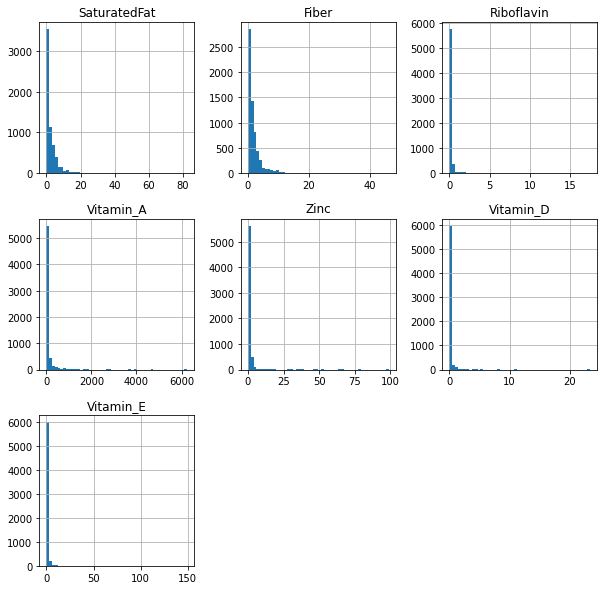

In [335]:
food_nutrition[dis_list].hist(bins=50, figsize=(10,10))
plt.show()

**Preprocessing data**

In [336]:
from sklearn.preprocessing import MinMaxScaler

In [337]:
columns_to_cluster = dis_list

In [338]:
#MinMaxScaler
#Transform features by scaling each feature to a given range.Here is an example to scale a data matrix to the [0, 1] range:
mms = MinMaxScaler()
food_scaled = mms.fit_transform(food_nutrition[columns_to_cluster])
print("Scaled Food Value: ", food_scaled[0,:])

Scaled Food Value:  [0.02435152 0.         0.00205714 0.0097522  0.0017196  0.00059893
 0.00053548]


In [339]:
columns_to_cluster_scaled = []
for i in dis_list:
  columns_to_cluster_scaled.append(i+"_scaled")

In [340]:
df_food_scaled = pd.DataFrame(food_scaled, columns=columns_to_cluster_scaled)

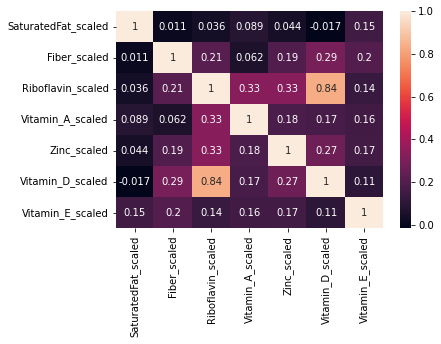

In [341]:
ax = sns.heatmap(df_food_scaled.corr(), annot=True)
plt.show()

**Training the model**

In [342]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [343]:
n_clusters = range(2,21)
ssd = []
sc = []
dict={}
for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(food_scaled)
    preds = km.predict(food_scaled) 
    centers = km.cluster_centers_ 
    ssd.append(km.inertia_) 
    score = silhouette_score(food_scaled, preds, metric='euclidean')
    sc.append(score)                                                             #calculate the goodness of a clustering
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))
    dict[n] = score


Number of Clusters = 2, Silhouette Score = 0.6323501656425353
Number of Clusters = 3, Silhouette Score = 0.5883435112707048
Number of Clusters = 4, Silhouette Score = 0.5958672549990905
Number of Clusters = 5, Silhouette Score = 0.5421756748924406
Number of Clusters = 6, Silhouette Score = 0.3933382110515812
Number of Clusters = 7, Silhouette Score = 0.4030905206718632
Number of Clusters = 8, Silhouette Score = 0.36280266075311857
Number of Clusters = 9, Silhouette Score = 0.3639610502373998
Number of Clusters = 10, Silhouette Score = 0.3743216120814354
Number of Clusters = 11, Silhouette Score = 0.37576417736469303
Number of Clusters = 12, Silhouette Score = 0.3849572125930139
Number of Clusters = 13, Silhouette Score = 0.3076206527886597
Number of Clusters = 14, Silhouette Score = 0.303461337098808
Number of Clusters = 15, Silhouette Score = 0.30896828324444237
Number of Clusters = 16, Silhouette Score = 0.3113928218474605
Number of Clusters = 17, Silhouette Score = 0.305259033166040

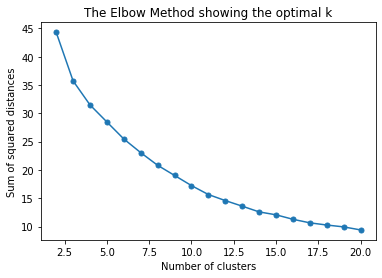

In [344]:
plt.plot(n_clusters, ssd, marker='.', markersize=10,animated=True)
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [345]:
k=6
model = KMeans(n_clusters=k, random_state=42).fit(food_scaled)
pred = model.predict(food_scaled)
# print(pred)
# print(model.labels_)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [0 0 0 0 0 0 0 0 0 0]


**Visualizing the clusters**

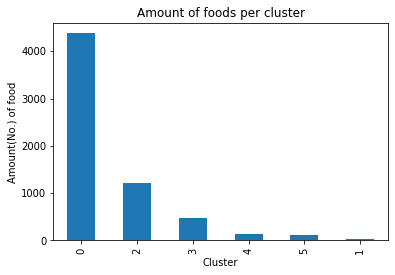

In [346]:
df_food_scaled['cluster'] = model.labels_
df_food_scaled['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount(No.) of food')
plt.title('Amount of foods per cluster')
plt.show()

In [347]:
display(df_food_scaled['cluster'].value_counts())
minor_cluster = df_food_scaled['cluster'].value_counts().tail(1)
print("Amount of food in the smallest cluster: ", int(minor_cluster.values))

0    4378
2    1210
3     479
4     132
5     105
1      28
Name: cluster, dtype: int64

Amount of food in the smallest cluster:  28


In [348]:
df_food_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SaturatedFat_scaled  6332 non-null   float64
 1   Fiber_scaled         6332 non-null   float64
 2   Riboflavin_scaled    6332 non-null   float64
 3   Vitamin_A_scaled     6332 non-null   float64
 4   Zinc_scaled          6332 non-null   float64
 5   Vitamin_D_scaled     6332 non-null   float64
 6   Vitamin_E_scaled     6332 non-null   float64
 7   cluster              6332 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 371.1 KB


In [349]:
food_nutrition.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6332 entries, 0 to 6331
Data columns (total 37 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                6332 non-null   object 
 1   Description             6332 non-null   object 
 2   NutrientDataBankNumber  6332 non-null   int64  
 3   Carotene                6332 non-null   float64
 4   Cryptoxanthin           6332 non-null   float64
 5   Carbohydrate            6332 non-null   float64
 6   Cholesterol             6332 non-null   float64
 7   Choline                 6332 non-null   float64
 8   Fiber                   6332 non-null   float64
 9   Lutein and Zeaxanthin   6332 non-null   float64
 10  Lycopene                6332 non-null   float64
 11  Niacin                  6332 non-null   float64
 12  Protein                 6332 non-null   float64
 13  Retinol                 6332 non-null   float64
 14  Riboflavin              6332 non-null   

In [350]:
df_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')

for cluster in range(k):
    display(df_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

Description
cluster                                                   
0                                  Sea bass, coated, fried
0                                          Cherries, dried
0        Rice, white, with cheese and/or cream based sa...
0                                  Applesauce, unsweetened
0        Tomato noodle soup, canned, prepared with wate...
0             Pasta with tomato-based sauce, ready-to-heat
0                                  Mixed salad greens, raw
0                                   Thistle leaves, cooked
0                                          Coffee, Turkish
0        Asian chicken or turkey garden salad, chicken ...

Description
cluster                                                   
1          Cereal (General Mills Fiber One Honey Clusters)
1         Nutritional powder mix, high protein (Slim Fast)
1                 Cereal (Nature's Path Organic Flax Plus)
1                                 Vegetable mixture, dried
1           Nutritional powder mix, sugar free (Slim Fast)
1        Cereal or granola bar (General Mills Fiber One...
1                            Coffee substitute, dry powder
1                                                    Yeast
1                                     Crackers, crispbread
1        Cereal or granola bar, high fiber, coated with...

Description
cluster                                                   
2        Pizza, cheese, with vegetables, from restauran...
2        Pasta, whole grain, with cream sauce, home recipe
2                                    Pie, strawberry cream
2                                   MILKY WAY MIDNIGHT Bar
2        Pasta with cream sauce and seafood, ready-to-heat
2                                             Egg, creamed
2          Stewed seasoned ground beef, Puerto Rican style
2        Egg omelet or scrambled egg, with cheese, made...
2                   Hamburger, on white bun, 1 small patty
2                        Ice cream sundae, caramel topping

Description
cluster                                                 
3                                       Raspberries, raw
3                             Almonds, chocolate covered
3                        Cereal, puffed wheat, sweetened
3                                           Shrimp chips
3        Popcorn, ready-to-eat packaged, butter flavored
3                         Peanuts, dry roasted, unsalted
3                            Muffin, English, wheat bran
3                 Nutrition bar (Clif Kids Organic Zbar)
3                 Black beans, from canned, no added fat
3                                   Blackberries, frozen

Description
cluster                                   
4                       Nuts, carob-coated
4                           Reese's Pieces
4        Quiche with meat, poultry or fish
4           3 Musketeers Truffle Crisp Bar
4                             Garlic sauce
4                     Butterscotch morsels
4                    Cheese, Gouda or Edam
4                    Butter-oil blend, tub
4             Cheese, Parmesan, dry grated
4                         Chocolate, white

Description
cluster                                                   
5            Livers, chicken, chopped, with eggs and onion
5                          Cereal (General Mills Cheerios)
5         Cereal, chocolate flavored, frosted, puffed corn
5                Cereal (Malt-O-Meal Honey Graham Squares)
5                                   Chicken liver, braised
5                                          Oysters, canned
5                                         Cereal, oat, NFS
5        Nutritional powder mix, sugar free (Carnation ...
5        Cereal (Post Honey Bunches of Oats Honey Roasted)
5                         Cereal (Malt-O-Meal Corn Bursts)

In [351]:
df_food_joined.head(5)
# df_food_joined.info()

Category                     Description  NutrientDataBankNumber  \
cluster                                                                    
0           Milk                     Milk, human                11000000   
0           Milk                       Milk, NFS                11100000   
0           Milk                     Milk, whole                11111000   
0           Milk         Milk, low sodium, whole                11111100   
0           Milk  Milk, calcium fortified, whole                11111150   

         Carotene  Cryptoxanthin  Carbohydrate  Cholesterol  Choline  Fiber  \
cluster                                                                       
0             7.0            0.0          6.89         14.0     16.0    0.0   
0             4.0            0.0          4.87          8.0     17.9    0.0   
0             7.0            0.0          4.67         12.0     17.8    0.0   
0             7.0            0.0          4.46         14.0     16.0    0.0   
0             7.0            0.0          4.67         12.0     17.8    0.0   

         Lutein and Zeaxanthin  ...  Vitamin_D  Vitamin_E  Vitamin_K  \
cluster                         ...                                    
0                          0.0  ...      0.014       0.08        0.3   
0                          0.0  ...      0.057       0.03        0.2   
0                          0.0  ...      0.056       0.05        0.3   
0                          0.0  ...      0.020       0.08        0.3   
0                          0.0  ...      0.056       0.05        0.3   

         SaturatedFat_scaled  Fiber_scaled  Riboflavin_scaled  \
cluster                                                         
0                   0.024352           0.0           0.002057   
0                   0.014109           0.0           0.007829   
0                   0.022545           0.0           0.007886   
0                   0.026109           0.0           0.006000   
0                   0.022545           0.0           0.007886   

         Vitamin_A_scaled  Zinc_scaled  Vitamin_D_scaled  Vitamin_E_scaled  
cluster                                                                     
0                0.009752     0.001720          0.000599          0.000535  
0                0.009432     0.004248          0.002439          0.000201  
0                0.005116     0.004147          0.002396          0.000335  
0                0.004636     0.003844          0.000856          0.000535  
0                0.005116     0.004147          0.002396          0.000335  

[5 rows x 44 columns]

**Applying PCA to visualize the clusters**

In [352]:
from sklearn.decomposition import PCA

In [353]:
pca = PCA(n_components=len(dis_list), random_state=42)
food_pca = pca.fit_transform(food_scaled)
pca.explained_variance_ratio_.sum()

1.0000000000000002

In [354]:
column_list=[]
for i in range(len(dis_list)):
  column_list.append("PC"+str(i))
print(column_list)

['PC0', 'PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']


In [355]:
df_pca = pd.DataFrame(food_pca, columns=column_list)
df_pca['cluster'] = model.labels_
# df_pca.head()
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6332 entries, 0 to 6331
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PC0      6332 non-null   float64
 1   PC1      6332 non-null   float64
 2   PC2      6332 non-null   float64
 3   PC3      6332 non-null   float64
 4   PC4      6332 non-null   float64
 5   PC5      6332 non-null   float64
 6   PC6      6332 non-null   float64
 7   cluster  6332 non-null   int32  
dtypes: float64(7), int32(1)
memory usage: 371.1 KB


In [356]:
sampled_clusters_pca = pd.DataFrame()

for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

0    28
2    28
4    28
1    28
3    28
5    28
Name: cluster, dtype: int64

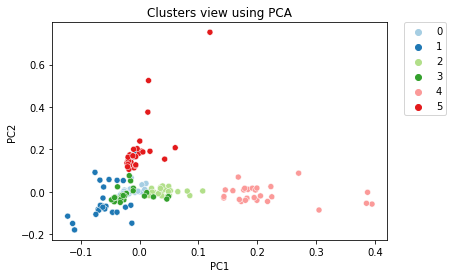

In [357]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=sampled_clusters_pca, legend="full", palette='Paired')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.show()

In [358]:
df_user_food_joined = pd.concat([food_nutrition,df_food_scaled], axis=1).set_index('cluster')
for cluster in df_food_scaled['cluster'].unique():
    display(df_user_food_joined.loc[cluster, ['Description']].sample(frac=1).head(10))

Description
cluster                                                   
0        Egg substitute, omelet, scrambled, or fried, w...
0                                               Chard, raw
0        Rice, brown, with carrots and dark green veget...
0                                            Rice dressing
0                                             Taro, cooked
0        Chicken or turkey and vegetables including car...
0        Infant formula, powder, made with water, NFS (...
0                                       Tomato chili sauce
0             Asparagus soup, cream of, prepared with milk
0                          Soft drink, cola, decaffeinated

Description
cluster                                                   
2                                             Flaxseed oil
2               Stuffed pot roast, Puerto Rican style, NFS
2                   Cookie, marshmallow, chocolate-covered
2        Double cheeseburger, from fast food, 2 medium ...
2                      Pretzels, hard, coated, gluten free
2        Pizza with meat and vegetables, from frozen, m...
2                                          Sesame dressing
2         Potato, hash brown, from restaurant, with cheese
2        Egg omelet or scrambled egg, with cheese and v...
2                      Soft taco with meat, from fast food

Description
cluster                                                   
4        Cookie, butter or sugar, with chocolate icing ...
4                           Rice, cooked with coconut milk
4                Popcorn, movie theater, with added butter
4                 Shortening, NS as to vegetable or animal
4                                             Honey butter
4                                               Peanut oil
4        Toblerone, milk chocolate with honey and almon...
4                                              Coconut oil
4                                Cheese, Blue or Roquefort
4                                   Coffee creamer, powder

Description
cluster                                                   
1                          Cocoa powder, not reconstituted
1                                Cereal (Post Bran Flakes)
1        Cereal (General Mills Fiber One Raisin Bran Cl...
1                                               Flax seeds
1                                                    Yeast
1                                 Vegetable mixture, dried
1                                    Cereal (Kashi GOLEAN)
1        Nutritional powder mix (Kellogg's Special K20 ...
1                       Nutritional powder mix (Slim Fast)
1                               Cereal (Barbara's Puffins)

Description
cluster                                                   
3                               Sweet potato fries, school
3                                           Cereal, muesli
3                          Popcorn, microwave, kettle corn
3               Cereal (Kellogg's Froot Loops Marshmallow)
3        Green peas, fresh, cooked with butter or marga...
3        Cereal or granola bar, peanuts , oats, sugar, ...
3                                      Crackers, flatbread
3                   Kidney beans, from dried, no added fat
3                             Cereal (Kashi GOLEAN Crunch)
3                               Pinto beans and white rice

Description
cluster                                                 
5                       Cereal (General Mills Chex Corn)
5        Oysters, coated, baked or broiled, no added fat
5                                    Oysters Rockefeller
5                       Cereal (Kellogg's Rice Krispies)
5                                       Oysters, steamed
5                               Cereal (Kellogg's Smorz)
5                           Cereal (Post Fruity Pebbles)
5                                 Chicken liver, braised
5                       Cereal (General Mills Honey Kix)
5                   Cereal (Malt-O-Meal Colossal Crunch)

In [359]:
# df_user_food_joined.info()
df_user_food_joined.head()

Category                     Description  NutrientDataBankNumber  \
cluster                                                                    
0           Milk                     Milk, human                11000000   
0           Milk                       Milk, NFS                11100000   
0           Milk                     Milk, whole                11111000   
0           Milk         Milk, low sodium, whole                11111100   
0           Milk  Milk, calcium fortified, whole                11111150   

         Carotene  Cryptoxanthin  Carbohydrate  Cholesterol  Choline  Fiber  \
cluster                                                                       
0             7.0            0.0          6.89         14.0     16.0    0.0   
0             4.0            0.0          4.87          8.0     17.9    0.0   
0             7.0            0.0          4.67         12.0     17.8    0.0   
0             7.0            0.0          4.46         14.0     16.0    0.0   
0             7.0            0.0          4.67         12.0     17.8    0.0   

         Lutein and Zeaxanthin  ...  Vitamin_D  Vitamin_E  Vitamin_K  \
cluster                         ...                                    
0                          0.0  ...      0.014       0.08        0.3   
0                          0.0  ...      0.057       0.03        0.2   
0                          0.0  ...      0.056       0.05        0.3   
0                          0.0  ...      0.020       0.08        0.3   
0                          0.0  ...      0.056       0.05        0.3   

         SaturatedFat_scaled  Fiber_scaled  Riboflavin_scaled  \
cluster                                                         
0                   0.024352           0.0           0.002057   
0                   0.014109           0.0           0.007829   
0                   0.022545           0.0           0.007886   
0                   0.026109           0.0           0.006000   
0                   0.022545           0.0           0.007886   

         Vitamin_A_scaled  Zinc_scaled  Vitamin_D_scaled  Vitamin_E_scaled  
cluster                                                                     
0                0.009752     0.001720          0.000599          0.000535  
0                0.009432     0.004248          0.002439          0.000201  
0                0.005116     0.004147          0.002396          0.000335  
0                0.004636     0.003844          0.000856          0.000535  
0                0.005116     0.004147          0.002396          0.000335  

[5 rows x 44 columns]

**Recommending Food**

In [360]:
df_user_food_joined.reset_index(inplace=True)
cluster_pct = df_user_food_joined.cluster.value_counts(normalize=True)*20

if int(cluster_pct.round(0).sum()) < 20:
    cluster_pct[cluster_pct < 0.5] = cluster_pct[cluster_pct < 0.5] + 1.0
    
display(cluster_pct)
print('Total food: ', int(cluster_pct.round(0).sum()))

0    13.828174
2     3.821857
3     1.512950
4     0.416930
5     0.331649
1     0.088440
Name: cluster, dtype: float64

Total food:  20


In [361]:
df_food_joined.reset_index(inplace=True)
df_food_joined.head(3)

cluster Category  Description  NutrientDataBankNumber  Carotene  \
0        0     Milk  Milk, human                11000000       7.0   
1        0     Milk    Milk, NFS                11100000       4.0   
2        0     Milk  Milk, whole                11111000       7.0   

   Cryptoxanthin  Carbohydrate  Cholesterol  Choline  Fiber  ...  Vitamin_D  \
0            0.0          6.89         14.0     16.0    0.0  ...      0.014   
1            0.0          4.87          8.0     17.9    0.0  ...      0.057   
2            0.0          4.67         12.0     17.8    0.0  ...      0.056   

   Vitamin_E  Vitamin_K  SaturatedFat_scaled  Fiber_scaled  Riboflavin_scaled  \
0       0.08        0.3             0.024352           0.0           0.002057   
1       0.03        0.2             0.014109           0.0           0.007829   
2       0.05        0.3             0.022545           0.0           0.007886   

   Vitamin_A_scaled  Zinc_scaled  Vitamin_D_scaled  Vitamin_E_scaled  
0          0.009752     0.001720          0.000599          0.000535  
1          0.009432     0.004248          0.002439          0.000201  
2          0.005116     0.004147          0.002396          0.000335  

[3 rows x 45 columns]

In [362]:
df_user_food_joined['cluster_pct'] = df_user_food_joined['cluster'].apply(lambda c: cluster_pct[c])
df_user_food_joined.drop(columns=columns_to_cluster_scaled, inplace=True)
df_user_food_joined.head(3)

cluster Category  Description  NutrientDataBankNumber  Carotene  \
0        0     Milk  Milk, human                11000000       7.0   
1        0     Milk    Milk, NFS                11100000       4.0   
2        0     Milk  Milk, whole                11111000       7.0   

   Cryptoxanthin  Carbohydrate  Cholesterol  Choline  Fiber  ...  Sodium  \
0            0.0          6.89         14.0     16.0    0.0  ...    17.0   
1            0.0          4.87          8.0     17.9    0.0  ...    39.0   
2            0.0          4.67         12.0     17.8    0.0  ...    38.0   

   Zinc  Vitamin_A  Vitamin_B12  Vitamin_B6  Vitamin_C  Vitamin_D  Vitamin_E  \
0  0.17       61.0         0.05       0.011        5.0      0.014       0.08   
1  0.42       59.0         0.56       0.060        0.1      0.057       0.03   
2  0.41       32.0         0.54       0.061        0.0      0.056       0.05   

   Vitamin_K  cluster_pct  
0        0.3    13.828174  
1        0.2    13.828174  
2        0.3    13.828174  

[3 rows x 39 columns]

In [363]:
final_Food = pd.DataFrame()

for ncluster, pct in cluster_pct.items():
    foods = df_food_joined[df_food_joined['cluster'] == ncluster].sample(n=int(round(pct, 0)))
    final_Food = pd.concat([final_Food,foods], ignore_index=True)
    if len(final_Food) > 20 :
        flag = 20 - len(final_Food)
        final_Food = final_Food[:flag]
# final_Food.head(10)

**Appying Random Forest**

In [364]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [365]:
X=df_food_scaled[columns_to_cluster_scaled]   # Features
y=df_food_scaled['cluster']

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [366]:
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train)
#Train the model using the training sets 
y_pred=clf.predict(X_test)
y_pred

array([2, 0, 0, ..., 5, 0, 0], dtype=int32)

In [367]:
clf.estimators_[0]

DecisionTreeClassifier(max_features='auto', random_state=2121836698)

In [368]:
sample_tree = clf.estimators_[20]
sample_tree

DecisionTreeClassifier(max_features='auto', random_state=2087333271)

In [369]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [370]:
def get_dt_graph(dt_classifier):
    dot_data = StringIO()
    export_graphviz(dt_classifier, out_file=dot_data, filled=True,rounded=True,
                    feature_names=X.columns, 
                    class_names=['K1', 'K2','K3', 'K4','K5', 'K6'])
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

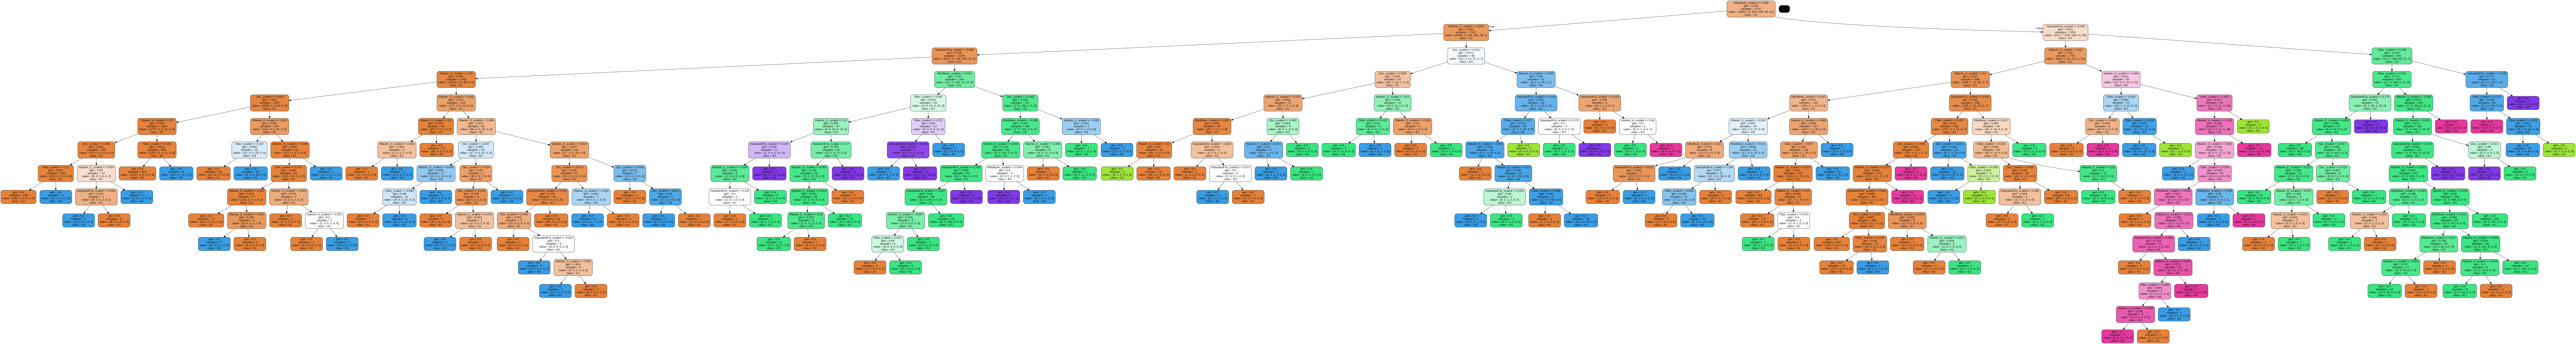

In [371]:
gph = get_dt_graph(sample_tree)
Image(gph.create_png())

In [372]:
clf.feature_importances_

array([0.520353  , 0.23022819, 0.04872733, 0.04387444, 0.08053964,
       0.03936603, 0.03691138])

In [373]:
imp_df = pd.DataFrame({
    "Nutritions": X_train.columns,
    "Importance": clf.feature_importances_
})

In [374]:
imp_df.sort_values(by="Importance", ascending=False)

Nutritions  Importance
0  SaturatedFat_scaled    0.520353
1         Fiber_scaled    0.230228
4          Zinc_scaled    0.080540
2    Riboflavin_scaled    0.048727
3     Vitamin_A_scaled    0.043874
5     Vitamin_D_scaled    0.039366
6     Vitamin_E_scaled    0.036911

In [375]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [376]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9889473684210527


In [377]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1277,    0,    7,    0,    0,    0],
       [   0,    2,    0,    1,    0,    0],
       [   4,    0,  373,    4,    0,    0],
       [   1,    0,    0,  160,    0,    1],
       [   0,    0,    0,    0,   36,    0],
       [   2,    0,    1,    0,    0,   31]])

In [378]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm)

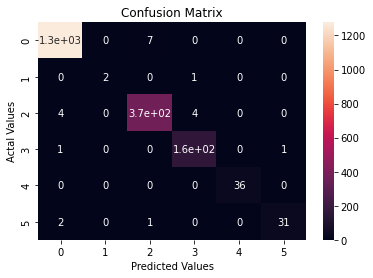

In [379]:
#Plotting the confusion matrix
ax = sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [380]:
final_Food[['Description']]

Description
0                                        Plum, canned
1                       Pretzels, hard, plain, salted
2                                Barley, no added fat
3                      French toast, from school, NFS
4   Fruit salad, fresh or raw, including citrus fr...
5   Chicken or turkey, stuffing, and vegetables in...
6         Egg, whole, cooked, NS as to cooking method
7     Chocolate milk, made from syrup with whole milk
8                        Beets, NS as to form, cooked
9       Chicken drumstick, rotisserie, skin not eaten
10                        Mussels, steamed or poached
11                           Gravy, poultry, fat free
12                    Broccoli, NS as to form, cooked
13  Enchilada with chicken and beans, red-chile or...
14    Pasta with cream sauce and poultry, home recipe
15                                    Veal parmigiana
16  Chicken fillet wrap sandwich, fried, from fast...
17                                        Knish, meat
18           Black beans, from fast food / restaurant
19             Cereal (Kellogg's Frosted Mini-Wheats)

In [381]:
chartval=[]
for i in columns_to_cluster_scaled:
  chartval.append(final_Food[i].sum())

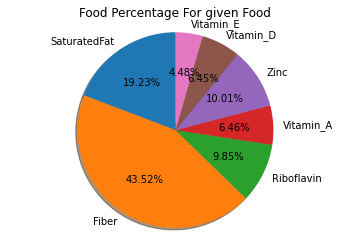

In [382]:
labels= columns_to_cluster
sizes= chartval
plt.pie(sizes,labels=labels, startangle=90, shadow=True,autopct='%1.2f%%')                   # explode=(0.1, 0.1, 0.1, 0.1,0.1, 0.1, 0.1),
plt.title('Food Percentage For given Food')
plt.axis('equal')
plt.show()